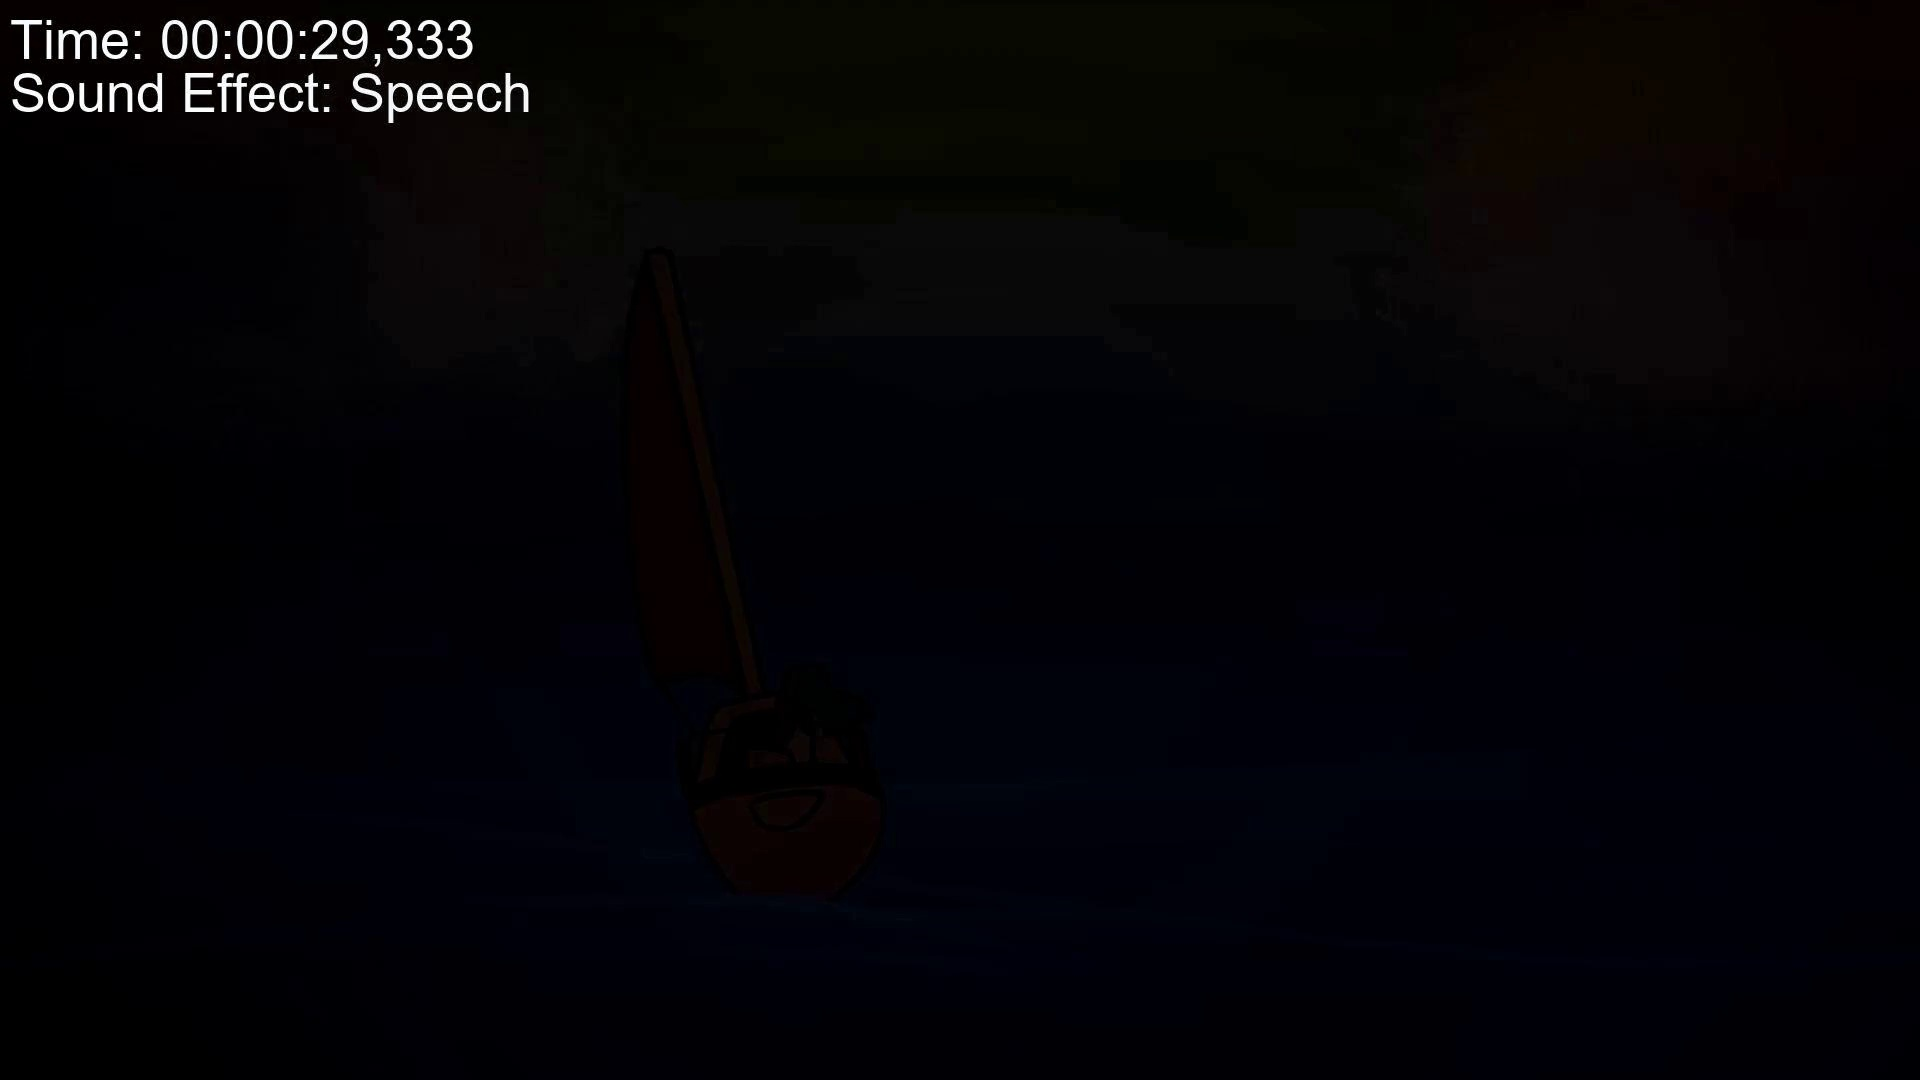

Length of image array: 89


In [17]:
from openai import OpenAI
from IPython.display import display, Image, Audio
import cv2
import base64
import time

client = OpenAI()

base64Frames = []
video = cv2.VideoCapture("./videos/output.mp4")
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

# check loading of video
display_handle = display(None, display_id=True)
print(f"Length of image array: {len(base64Frames)}")
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8")), width=600))
    time.sleep(1/48)

In [15]:
prompt = """
These are frames from a video that I want to upload. 
Can you make a recap of what happens in the video, taking note of major changes of events in the video. 
Be as detailed as to create an audio descriptive aid, but still be concise.
Minimize the number of seperate Time events you use, which means grouping together events as much as possible.
Speak naturally and in a way that would be helpful to someone who is visually impaired.
Sound effects are provided to give you more context for what is occurring at each frame, use them to help describe events but do not mention the provision of this context.
Do not provide an overall summary.
Your output should be only the content of a .srt file.
For each caption in the srt, it is very important that it is able to be spoken within the timestamps you provide such that it can be read out loud within the duration of the timestamp.
With this in mind, prefer to create longer timestamp splits for each caption to ensure that the captions are understandable.
It is of upmost importance that the captions are accurate, the timings do not overlap, and that the captions are within the duration of the video.
"""
reducedFrames = base64Frames[0::4]

PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            prompt,
            *map(lambda x: {"image": x, "resize": 200}, reducedFrames),
        ],
    },
]

print(f"Processing {len(reducedFrames)} frames...")

params = {
    "model": "gpt-4o-mini",
    "messages": PROMPT_MESSAGES,
}
result = None
try:
    print("Creating completions...")
    result = client.chat.completions.create(**params)
    print(f"Completion tokens used: {result.usage.completion_tokens}")
    print(f"Prompt tokens used: {result.usage.prompt_tokens}")
    print(f"Total tokens used: {result.usage.total_tokens}")
except Exception as e:
    print(f"An error occurred: {e}")

Processing 23 frames...
Creating completions...
Completion tokens used: 368
Prompt tokens used: 84769
Total tokens used: 85137


In [16]:
print(result.choices[0].message.content)

```srt
1
00:00:00,000 --> 00:00:04,000
A train slowly comes to a stop. Inside, passengers sit quietly, creating an atmosphere of calm anticipation.

2
00:00:04,000 --> 00:00:06,666
The train doors slide open, revealing a quiet scene outside.

3
00:00:06,666 --> 00:00:10,666
In the train, a young woman with headphones and a scarf rests comfortably, her eyes closed.

4
00:00:10,666 --> 00:00:14,666
Suddenly, she’s in a sunlit scenario, now dressed in lighter clothing, wearing a scarf that reflects the season.

5
00:00:14,666 --> 00:00:16,000
A gentle voice speaks about adventure, initiating a moment of curiosity.

6
00:00:16,000 --> 00:00:18,000
Transitioning to a picturesque sailing scene, vibrant skies stretch in all directions.

7
00:00:18,000 --> 00:00:20,000
The young woman navigates the sailboat, her focus directed forward with determination.

8
00:00:20,000 --> 00:00:21,333
She pulls on a handle with purpose, the boat responding instantly.

9
00:00:21,333 --> 00:00:25,333
As the s